# Pythonを使ったセンサデータ解析
テストプログラムです。気温に関するグラフが表示されたら、動作確認完了です。

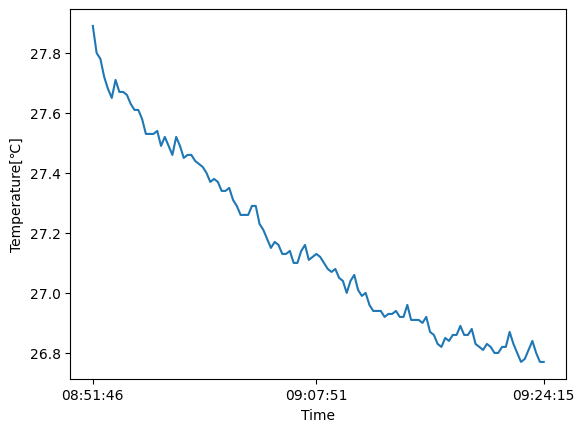

In [2]:
import requests
import matplotlib.pyplot as plt

chNum = '1807461' #チャンネル番号
url = 'https://api.thingspeak.com/channels/' + chNum + '/feeds.json' #ThingSpeakにアクセスするためのアドレス
para = {'timezone':'Asia/Tokyo','results':120} #タイムゾーン,要求データ数の設定
response = requests.get( url, params = para ) #データの要求

timeLis = [] #時間
tempLis = [] #温度
resList = response.json()['feeds'] #'feeds'のみ取り出し
for elm in resList:
    timeLis.append( elm['created_at'][11:19] ) #時刻だけ取り出す
    tempLis.append( float( elm['field2'] ) ) #温度データ

plt.figure() #温度用のグラフを用意
plt.plot( timeLis, tempLis ) #グラフの表示
plt.xlabel( 'Time' ) #横軸のタイトル
plt.ylabel( 'Temperature[℃]' ) #縦軸のタイトル
plt.xticks( [0, 59, 119], [timeLis[0], timeLis[59], timeLis[119]] ) #横軸の目盛り
plt.show() #グラフの表示